In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
d = pd.read_csv('heart.csv')

In [3]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
d.shape

(303, 14)

In [5]:
d.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
X = d.drop('target', axis=1)
y = d['target']

In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#apply SelectKBest class to extract top 10 best features
test = SelectKBest(score_func= f_classif)
test.fit(X,y)
scores= pd.DataFrame(test.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,age,16.116700
1,sex,25.792191
2,cp,69.772271
3,trestbps,6.458169
4,chol,2.202983
5,fbs,0.236942
6,restecg,5.777209
7,thalach,65.120104
8,exang,70.952438
9,oldpeak,68.551439


In [10]:
print(featureScores.nlargest(10,'Score'))

       Specs      Score
8      exang  70.952438
2         cp  69.772271
9    oldpeak  68.551439
7    thalach  65.120104
11        ca  54.559834
10     slope  40.902071
12      thal  40.407696
1        sex  25.792191
0        age  16.116700
3   trestbps   6.458169


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
X_scaled = StandardScaler().fit_transform(X)

In [13]:
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])
X_pca

,PC1,PC2
0,0.624111,2.321270
1,-0.455988,-0.957351
2,-1.828805,0.042885
3,-1.716006,-0.495337
4,-0.371356,0.301156
...,...,...
298,1.146672,-0.519529
299,-0.708593,-1.045752
300,2.459005,0.478262
301,1.762755,-2.336816


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.1)

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7741935483870968


In [25]:
finalDf = pd.concat([X_pca, d[['target']]], axis = 1)
finalDf

,PC1,PC2,target
0,0.624111,2.321270,1
1,-0.455988,-0.957351,1
2,-1.828805,0.042885,1
3,-1.716006,-0.495337,1
4,-0.371356,0.301156,1
...,...,...,...
298,1.146672,-0.519529,0
299,-0.708593,-1.045752,0
300,2.459005,0.478262,0
301,1.762755,-2.336816,0


In [26]:
X = finalDf.iloc[:,:-1]
y = finalDf.iloc[:,-1]
X
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

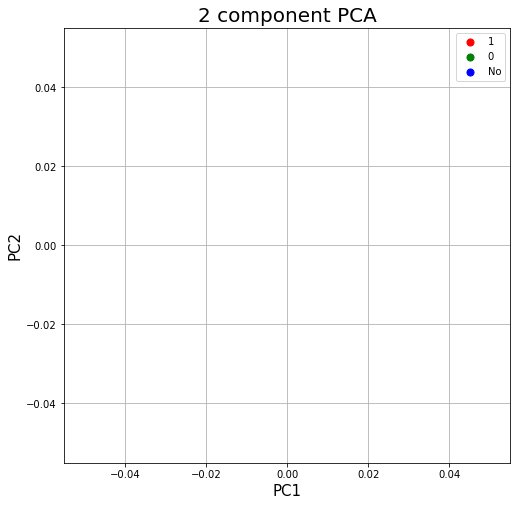

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['1', '0','No']
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [28]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_squared_error

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [31]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[-0.18963965  0.08178111]
0.5523895871452736
R2 score 0.5683488025227303
RMSE 0.3281033224150057


In [32]:
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [33]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[-0.18961102  0.08176004]
0.5523916605373409
R2 score 0.5683303754523609
RMSE 0.32811032566035975


In [34]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

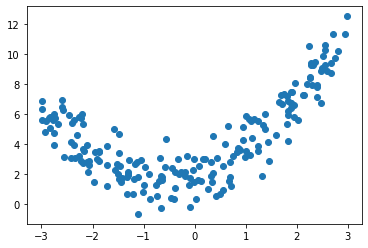

In [35]:
plt.scatter(X, y)
plt.show() 

In [45]:

import seaborn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
%matplotlib inline

df = pd.read_csv('emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [46]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<AxesSubplot:xlabel='spam', ylabel='count'>

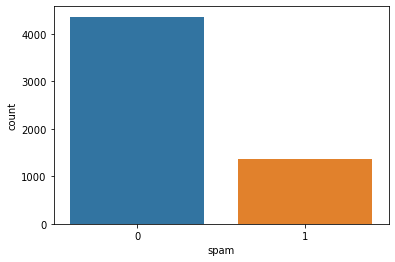

In [47]:
seaborn.countplot(x='spam',data=df)

In [48]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [49]:
X= df.text.values
y= df.spam.values

In [43]:
# x=cv.fit_transform(df)

In [44]:
feature_name= cv.get_feature_names()  
feature_name

['spam', 'text']

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_vectorized=cv.fit_transform(X)
X_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_vectorized,y,test_size=.25,random_state=1)

In [52]:
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred=mnb.predict(X_test)

In [53]:
print("Accuracy score: ", accuracy_score(y_test,pred))

Accuracy score:  0.9916201117318436


In [59]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

In [61]:

logr2=LogisticRegression()
score=cross_val_score(logr2,X_vectorized,y,cv= StratifiedKFold(5))

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Scores are [0.9877836  0.9895288  0.9895288  0.99388646 0.9860262 ]
Average Cross Validation (Test data accuracy): 0.9893507700983866


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
